**IDENTIFYING SHOPPING TREANDS USING DATA ANALYSIS**

**Customer ID - Unique identifier for each customer.**

* **Age** - Age of the customer.
*   **Gender** - Gender of the customer (Male/Female).
*  **Item Purchased** - The item purchased by the customer.
* **Category** - Category of the item purchased.
* **Purchase Amount (USD)** - The amount of the purchase in USD.
* **Location** - Location where the purchase was made.
* **Size** - Size of the purchased item.
* **Color** - Color of the purchased item.
* **Season** - Season during which the purchase was made.
* **Review Rating** - Rating given by the customer for the purchased item.
* **Subscription Status** - Indicates if the customer has a subscription (Yes/No).
* **Payment Method** - Customer's most preferred payment method.
* **Shipping Type** - Type of shipping chosen by the customer.
* **Discount Applied** - Indicates if a discount was applied to the purchase (Yes/No).
* **Promo Code Used** - Indicates if a promo code was used for the purchase (Yes/No).
* **Previous Purchases** - Number of previous purchases made by the customer.
* **Preferred Payment Method** - Payment Method - Preferred method of payment for online shopping (e.g., credit card, digital wallet, BNPL).
* **Frequency of Purchases** - Frequency at which the customer makes purchases (e.g., Weekly, Fortnightly, Monthly).

In [ ]:
!pip install WordCloud

In [ ]:
# importing libraries
import numpy as np # Importing the numpy library for array operations and mathematical functions
import pandas as pd # Use for exploring the data
import seaborn as sns # it has also plot
import matplotlib.pyplot as plt # for some extra plot functions
import plotly.express as px # this library can makes interactive plots


In [ ]:
# reading the data set
shop = pd.read_csv('/content/shopping_trends.csv')

In [ ]:
shop.shape

(3900, 19)

In [ ]:
shop.to_excel('shopping_trends_updated.xlsx')

In [ ]:
shop.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
shop.dtypes

,0
Customer ID,int64
Age,int64
Gender,object
Item Purchased,object
Category,object
Purchase Amount (USD),int64
Location,object
Size,object
Color,object
Season,object


In [ ]:
# it shows the names of the columns
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [ ]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [ ]:
shop.shape

(3900, 19)

In [ ]:
shop.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [ ]:
print(f"The unique values of the 'Gender' column are: {shop['Gender'].unique()}")
print()# This will print a blank line
print(f"The unique values of the 'Category' column are: {shop['Category'].unique()}")
print()# This will print a blank line
print(f"The unique values of the 'Size' column are: {shop['Size'].unique()}")
print()# This will print a blank line
print(f"The unique values of the 'Subscription Status' column are: {shop['Subscription Status'].unique()}")
print()# This will print a blank line
print(f"The unique values of the 'Shipping Type' column are: {shop['Shipping Type'].unique()}")
print()# This will print a blank line
print(f"The unique values of the 'Discount Applied' column are: {shop['Discount Applied'].unique()}")
print()# This will print a blank line
print(f"The unique values of the 'Promo Code Used' column are: {shop['Promo Code Used'].unique()}")
print()# This will print a blank line
print(f"The unique values of the 'Payment Method' column are: {shop['Payment Method'].unique()}")

The unique values of the 'Gender' column are: ['Male' 'Female']

The unique values of the 'Category' column are: ['Clothing' 'Footwear' 'Outerwear' 'Accessories']

The unique values of the 'Size' column are: ['L' 'S' 'M' 'XL']

The unique values of the 'Subscription Status' column are: ['Yes' 'No']

The unique values of the 'Shipping Type' column are: ['Express' 'Free Shipping' 'Next Day Air' 'Standard' '2-Day Shipping'
 'Store Pickup']

The unique values of the 'Discount Applied' column are: ['Yes' 'No']

The unique values of the 'Promo Code Used' column are: ['Yes' 'No']

The unique values of the 'Payment Method' column are: ['Credit Card' 'Bank Transfer' 'Cash' 'PayPal' 'Venmo' 'Debit Card']


## **OBSERVATION:**
Upon initial examination of the dataset, it is evident that we have a comprehensive and well-structured dataset with 3900 rows and 18 columns. The data is complete, with no missing values, which allows us to proceed confidently with our analysis.

Let's delve into the columns and their significance in understanding our custome      

-  **Customer ID:** This column serves as a unique identifier for each customer, enabling us to differentiate between individuals.
-  **Age:** The age column provides insights into the age demographics of our customers, helping us understand their preferences and behaviors.
-  **Gender:** This column showcases the gender of the customers, enabling us to analyze buying patterns based on gender.
-  **Item Purchased:** Here, we can identify the specific products that customers have bought, allowing us to gain an understanding of popular choices.
-  **Category:** The category column categorizes the products into different groups such as clothing, footwear, and more, aiding us in analyzing trends within specific product categories.
-  **Purchase Amount (USD):** This column reveals the amount customers spent on their purchases, providing insights into their spending habits.
-  **Location:** The location column indicates the geographical location of customers, which can help identify regional trends and preferences.
-  **Size:** This column denotes the size of the purchased products, assisting in understanding size preferences across different categories.
-  **Color:** Here, we can determine the color preferences of customers, aiding in analyzing color trends and their impact on purchasing decisions.
-  **Season:** The season column allows us to identify the season during which customers made their purchases, enabling us to explore seasonal shopping trends.
-  **Review Rating:** This column showcases the ratings given by customers, providing valuable feedback on product satisfaction and quality.
-  **Subscription Status:** This column indicates whether customers have opted for a subscription status, which can help us understand customer loyalty and engagement.
- **Payment Method:** The payment method column showcases the various methods used by customers to make their purchases, allowing us to analyze preferred payment options.
-  **Shipping Type:** Here, we can identify the different shipping methods used to deliver products to customers, shedding light on preferred shipping options.
-  **Discount Applied:** This column indicates whether a discount was applied to the purchased products, enabling us to analyze the impact of discounts on customer behavior.
-  **Promo Code Used:** Here, we can identify whether customers utilized promo codes during their purchases, helping us evaluate the effectiveness of promotional campaigns.
-  **Previous Purchases:** This column reveals the number of previous purchases made by customers, aiding in understanding customer loyalty and repeat business.
-  **Preferred Payment Method:**The dataset tracks consumers' preferred payment methods during online and in-store purchases, highlighting shifts in trends such as the rise of digital wallets, credit/debit cards, and cashless systems.
-  **Frequency of Purchases:** This column provides insights into the frequency at which customers make purchases, helping us identify patterns and customer buying habits.

Customer buying habits.
With this rich and diverse dataset, we are well-equipped to explore customer shopping trends, understand their preferences, and uncover valuable insights that can drive informed decision-making and enhance the overall customer experience. Let's embark on this exciting analysis journey!



## **1) What is the overall distribution of customer ages in the dataset?**

In [ ]:
shop['Age'].value_counts()

,count
Age,
69,88
57,87
41,86
25,85
49,84
50,83
54,83
27,83
62,83


In [ ]:
shop['Age'].mean()

44.06846153846154

In [ ]:
shop['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
shop['Age_category'] = pd.cut(shop['Age'], bins= [0,15, 18 , 30 , 50 , 70] , labels= ['child' , 'teen' , 'Young Adults' ,'Middle-Aged Adults'
                                                                                             , 'old'] )

In [ ]:
fig = px.histogram(shop , y = 'Age' , x = 'Age_category')
fig.show()

## **2) How does the average purchase amount vary across different product categories?**

In [ ]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases', 'Age_category'],
      dtype='object')

In [ ]:
shop['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [ ]:
shop.groupby('Category')['Purchase Amount (USD)'].mean()

,Purchase Amount (USD)
Category,
Accessories,59.838710
Clothing,60.025331
Footwear,60.255426
Outerwear,57.172840


## **3) Which gender has the highest number of purchases?**

In [ ]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases', 'Age_category'],
      dtype='object')

<Axes: xlabel='Gender', ylabel='Purchase Amount (USD)'>

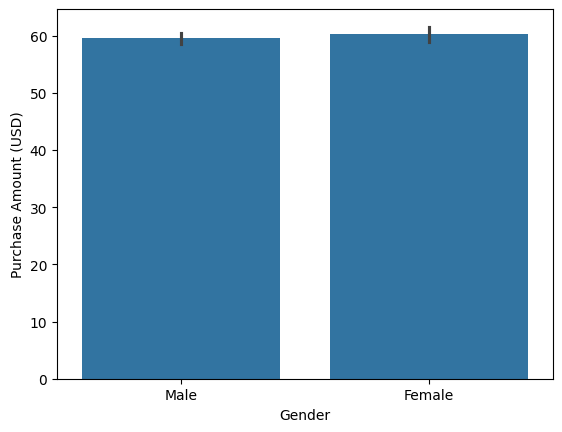

In [ ]:
sns.barplot(shop , x = 'Gender' , y = 'Purchase Amount (USD)')

## **4) What are the most commonly purchased items in each category?**

In [ ]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases', 'Age_category'],
      dtype='object')

In [ ]:
shop.groupby('Category')['Item Purchased'].value_counts()

Category     Item Purchased
Accessories  Jewelry           171
             Belt              161
             Sunglasses        161
             Scarf             157
             Hat               154
             Handbag           153
             Backpack          143
             Gloves            140
Clothing     Blouse            171
             Pants             171
             Shirt             169
             Dress             166
             Sweater           164
             Socks             159
             Skirt             158
             Shorts            157
             Hoodie            151
             T-shirt           147
             Jeans             124
Footwear     Sandals           160
             Shoes             150
             Sneakers          145
             Boots             144
Outerwear    Jacket            163
             Coat              161
Name: count, dtype: int64

In [ ]:
fig = px.histogram(shop , x = 'Item Purchased' , color = 'Category')
fig.show()

## **5 Are there any specific seasons or months where customer spending is significantly higher?**

In [ ]:
shop['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [ ]:
shop[shop['Season'] == 'Summer'].value_counts().sum()

955

In [ ]:
shop[shop['Season'] == 'Winter'].value_counts().sum()

971

In [ ]:
shop[shop['Season'] == 'Spring'].value_counts().sum()

999

In [ ]:
shop[shop['Season'] == 'Fall'].value_counts().sum()

975

In [ ]:
fig = px.histogram(shop , x = 'Season' , range_y= [200 , 1500] )

fig.show()

## **6) What is the average rating given by customers for each product category?**

In [ ]:
shop_groupby = shop.groupby('Category')['Review Rating'].mean().reset_index()

In [ ]:
fig = px.bar(shop_groupby ,x= 'Category' , y = 'Review Rating' )
fig.show()

## **7) Are there any notable differences in purchase behavior between subscribed and non-subscribed customers?**

In [ ]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases', 'Age_category'],
      dtype='object')

In [ ]:
shop['Subscription Status'].unique()

array(['Yes', 'No'], dtype=object)

<Axes: xlabel='Subscription Status', ylabel='Purchase Amount (USD)'>

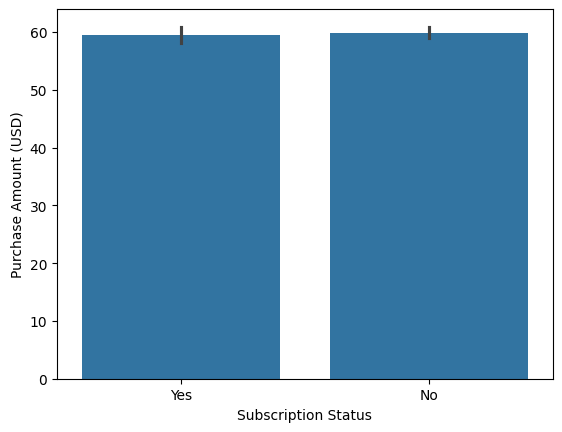

In [ ]:
sns.barplot(shop  , x = 'Subscription Status' , y = 'Purchase Amount (USD)')

In [ ]:
shop['Purchase Amount (USD)'].sum()

233081

In [ ]:
shop.groupby('Subscription Status')['Purchase Amount (USD)'].mean()

,Purchase Amount (USD)
Subscription Status,
No,59.865121
Yes,59.491928


## **8) Which payment method is the most popular among customers?**

In [ ]:
shop.groupby('Payment Method')['Purchase Amount (USD)'].mean().sort_values(ascending= False)

,Purchase Amount (USD)
Payment Method,
Venmo,61.241960
Credit Card,61.159483
Cash,59.927469
Bank Transfer,58.738924
PayPal,58.697492
Debit Card,58.638231


In [ ]:
shop_groupby = shop.groupby('Payment Method')['Purchase Amount (USD)'].mean().reset_index()

In [ ]:
fig = px.bar(shop_groupby , x = 'Payment Method' , y = 'Purchase Amount (USD)')
fig.show()

<Axes: xlabel='Payment Method', ylabel='Purchase Amount (USD)'>

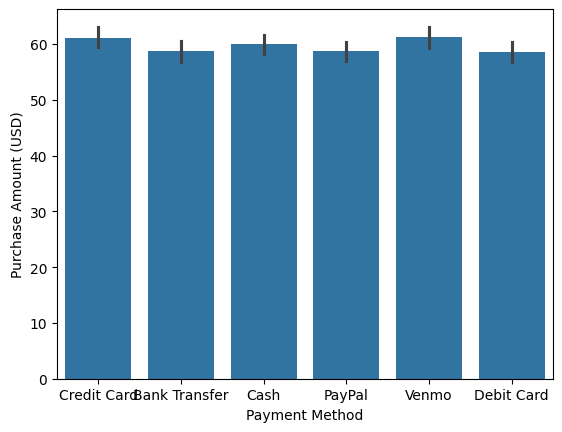

In [ ]:
sns.barplot(shop ,x='Payment Method' , y = 'Purchase Amount (USD)')

## **9) Do customers who use promo codes tend to spend more than those who don't?**

In [ ]:
shop_groupby  = shop.groupby('Promo Code Used')['Purchase Amount (USD)'].sum().reset_index()

In [ ]:
fig = px.sunburst(shop , path=['Gender' , 'Promo Code Used'] , values='Purchase Amount (USD)')
fig.show()

In [ ]:
fig  =  px.bar(shop_groupby , x= 'Promo Code Used' , y = 'Purchase Amount (USD)')
fig.show()

## **10) How does the frequency of purchases vary across different age groups?**

In [ ]:
shop[['Age' , 'Age_category']]

,Age,Age_category
0,55,old
1,19,Young Adults
2,50,Middle-Aged Adults
3,21,Young Adults
4,45,Middle-Aged Adults
...,...,...
3895,40,Middle-Aged Adults
3896,52,old
3897,46,Middle-Aged Adults
3898,44,Middle-Aged Adults


In [ ]:
shop['Age_category'].unique()

['old', 'Young Adults', 'Middle-Aged Adults', 'teen']
Categories (5, object): ['child' < 'teen' < 'Young Adults' < 'Middle-Aged Adults' < 'old']

In [ ]:
shop_group = shop.groupby('Frequency of Purchases')['Age'].sum()

In [ ]:
px.sunburst(shop , path=['Frequency of Purchases','Age_category'] , values='Age')

/usr/local/lib/python3.11/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



## **11) Are there any correlations between the size of the product and the purchase amount?**

In [ ]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases', 'Age_category'],
      dtype='object')

In [ ]:
shop_group = shop.groupby('Size')['Purchase Amount (USD)'].sum().reset_index()

In [ ]:
fig  = px.bar(shop_group , x = 'Size' , y ='Purchase Amount (USD)'  )
fig.show()

## **12) Which shipping type is preferred by customers for different product categories?**

In [ ]:
shop.groupby('Category')['Shipping Type'].value_counts().sort_values(ascending= False)

Category     Shipping Type 
Clothing     Standard          297
             Free Shipping     294
             Next Day Air      293
             Express           290
             Store Pickup      282
             2-Day Shipping    281
Accessories  Store Pickup      217
             Next Day Air      211
             Standard          208
             2-Day Shipping    206
             Express           203
             Free Shipping     195
Footwear     Free Shipping     122
             Standard          100
             Store Pickup       98
             Express            96
             Next Day Air       93
             2-Day Shipping     90
Outerwear    Free Shipping      64
             Express            57
             Store Pickup       53
             Next Day Air       51
             2-Day Shipping     50
             Standard           49
Name: count, dtype: int64

In [ ]:
shop['Shipping_Category'] =shop['Shipping Type'].map({'Express': 0, 'Free Shipping': 1, 'Next Day Air': 2,
                                                       'Standard': 3, '2-Day Shipping': 4, 'Store Pickup': 5})

In [ ]:
shop['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [ ]:
shop['Category_num'] =shop['Category'].map({'Clothing':1, 'Footwear':2, 'Outerwear':3, 'Accessories':4})

## **13) How does the presence of a discount affect the purchase decision of customers?**

In [ ]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases', 'Age_category', 'Shipping_Category',
       'Category_num'],
      dtype='object')

In [ ]:
shop_group = shop.groupby('Discount Applied')['Purchase Amount (USD)'].sum().reset_index()

In [ ]:
px.histogram(shop_group , x = 'Discount Applied' , y = 'Purchase Amount (USD)')

In [ ]:
fig = px.sunburst(shop , path = ['Gender' , 'Discount Applied'], values='Purchase Amount (USD)' , color= 'Gender')

fig.show()

## **14) Are there any specific colors that are more popular among customers?**

In [ ]:
px.histogram(shop , x = 'Color')

In [ ]:
shop['Color'].value_counts().nlargest(5)

,count
Color,
Olive,177
Yellow,174
Silver,173
Teal,172
Green,169


## **15) What is the average number of previous purchases made by customers?**

In [ ]:
shop['Previous Purchases'].mean()

25.35153846153846

## **16) Are there any noticeable differences in purchase behavior between different locations?**

In [ ]:
shop.groupby('Location')['Purchase Amount (USD)'].mean().sort_values(ascending = False)

,Purchase Amount (USD)
Location,
Alaska,67.597222
Pennsylvania,66.567568
Arizona,66.553846
West Virginia,63.876543
Nevada,63.379310
Washington,63.328767
North Dakota,62.891566
Virginia,62.883117
Utah,62.577465


In [ ]:
shop_group = shop.groupby('Location')['Purchase Amount (USD)'].mean().reset_index()

In [ ]:
fig = px.bar(shop_group, x = 'Location' , y = 'Purchase Amount (USD)')
fig.show()

## **17) Is there a relationship between customer age and the category of products they purchase?**

In [ ]:
shop_group = shop.groupby('Category')['Age'].mean().reset_index()

In [ ]:
fig = px.bar(shop_group ,y = 'Age' , x= 'Category')
fig.show()

## **18) How does the average purchase amount differ between male and female customers?**

In [ ]:
shop_group = shop.groupby('Gender')['Purchase Amount (USD)'].sum().reset_index()

In [ ]:
fig = px.bar(shop_group , x = 'Gender' , y = 'Purchase Amount (USD)')
fig.show()

In [ ]:
px.sunburst(data_frame= shop , path = ['Gender' ,'Age_category'] , values='Purchase Amount (USD)')

/usr/local/lib/python3.11/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



## **19) What is the overall distribution of customer ages in the dataset?**

In [ ]:
shop_group = shop.groupby('Category')['Age'].mean().reset_index()


In [ ]:
fig = px.bar(shop_group, x='Category', y='Age', title="Average Age by Product Category")
fig.update_layout(xaxis_title='Product Category', yaxis_title='Average Age')
fig.show()

## **20) How does customer age influence their product category preferences?**

In [ ]:
shop_group = shop.groupby(['Age', 'Category']).size().reset_index(name='Count')


In [ ]:
fig = px.bar(shop_group, x='Age', y='Count', color='Category',
             title="Product Category Preferences by Age",
             labels={'Age': 'Customer Age', 'Count': 'Number of Purchases'},
             barmode='stack')
fig.show()

 ## **21) What is the relationship between gender and preferred payment method?**

In [ ]:
shop_group = shop.groupby(['Gender', 'Preferred Payment Method']).size().reset_index(name='Count')


In [ ]:
fig = px.bar(shop_group, x='Gender', y='Count', color='Preferred Payment Method',
             title="Preferred Payment Method by Gender",
             labels={'Count': 'Number of Customers'},
             barmode='group')
fig.show()

## **22) How do customers with higher previous purchases tend to spend more on their current purchases?**

In [ ]:
shop_group = shop.groupby('Previous Purchases')['Purchase Amount (USD)'].mean().reset_index()


In [ ]:
fig = px.scatter(shop_group, x='Previous Purchases', y='Purchase Amount (USD)',
                 title="Previous Purchases vs Current Purchase Amount",
                 labels={'Previous Purchases': 'Previous Purchases', 'Purchase Amount (USD)': 'Average Spend'})
fig.show()

## **23) What is the average review rating for products across different categories?**

In [ ]:
shop_group = shop.groupby('Category')['Review Rating'].mean().reset_index()


In [ ]:
fig = px.bar(shop_group, x='Category', y='Review Rating',
             title="Average Review Rating by Product Category",
             labels={'Review Rating': 'Average Rating'})
fig.show()

## **24)  What is the relationship between item size and color with purchase frequency?**

In [ ]:
frequency_mapping = {
    'Annually': 1,
    'Quarterly': 3,
    'Monthly': 12,
    'Fortnightly': 26,
    'Every 3 Months': 4,
    'Bi-Weekly': 26,
    'Weekly': 52
}

In [ ]:
shop['Frequency of Purchases Numeric'] = shop['Frequency of Purchases'].map(frequency_mapping)


In [ ]:
shop_group = shop.groupby(['Size', 'Color'])['Frequency of Purchases Numeric'].mean().reset_index()


In [ ]:
fig = px.bar(shop_group, x='Size', y='Frequency of Purchases Numeric', color='Color',
             title="Average Purchase Frequency by Size and Color",
             labels={'Frequency of Purchases Numeric': 'Average Purchase Frequency'},
             barmode='group')
fig.show()

## **25) What is the effect of shipping type (e.g., standard vs. express) on customer satisfaction (review rating)?**

In [ ]:
shop_group = shop.groupby('Shipping Type')['Review Rating'].mean().reset_index()

In [ ]:
fig = px.bar(shop_group, x='Shipping Type', y='Review Rating',
             title="Effect of Shipping Type on Customer Satisfaction",
             labels={'Review Rating': 'Average Review Rating'},
             color='Shipping Type',
             color_continuous_scale='Viridis')

fig.show()